<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 180.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 171.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 145.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 154.5 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
 df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
# Count duplicate rows
dup_count = df.duplicated().sum()
print("Number of duplicate rows:", dup_count)

# Display first few duplicate rows
df[df.duplicated()].head()


Number of duplicate rows: 0


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
dup_subset = df[df.duplicated(subset=["MainBranch", "Employment", "RemoteWork"])]
print("Number of duplicate rows (subset):", dup_subset.shape[0])
dup_subset.head()
print(dup_subset["MainBranch"].value_counts().head())
print(dup_subset["Employment"].value_counts().head())
print(dup_subset["RemoteWork"].value_counts().head())



Number of duplicate rows (subset): 64876
MainBranch
I am a developer by profession                                                           50030
I am not primarily a developer, but I write code sometimes as part of my work/studies     6389
I am learning to code                                                                     3772
I code primarily as a hobby                                                               3249
I used to be a developer by profession, but no longer am                                  1436
Name: count, dtype: int64
Employment
Employed, full-time                                                         39021
Independent contractor, freelancer, or self-employed                         4828
Student, full-time                                                           4704
Employed, full-time;Independent contractor, freelancer, or self-employed     3542
Not employed, but looking for work                                           2336
Name: count, dtype: int64


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


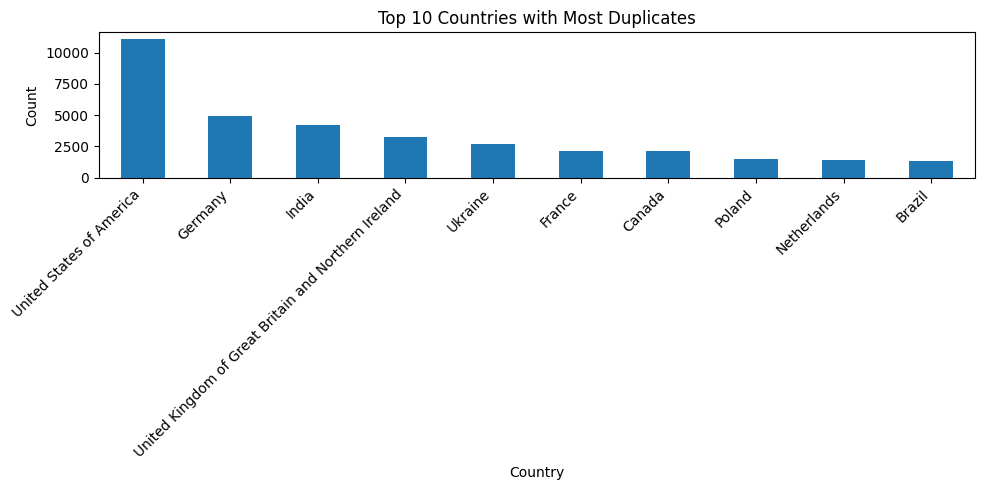

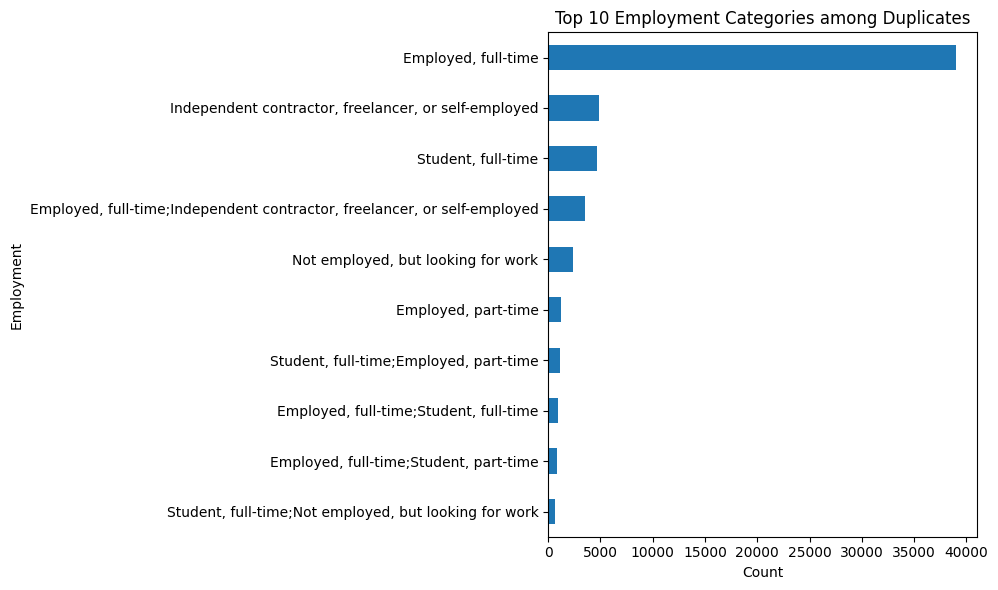

In [10]:
import matplotlib.pyplot as plt

# duplicates based on selected columns
subset_cols = ["MainBranch", "Employment", "RemoteWork"]
dup_rows = df[df.duplicated(subset=subset_cols, keep=False)]

# --- Bar chart: top 10 countries with most duplicates ---
dup_country = dup_rows["Country"].value_counts().head(10)
plt.figure(figsize=(10,5))
dup_country.plot(kind="bar")
plt.title("Top 10 Countries with Most Duplicates")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- bar chart: duplicates by Employment ---
e_counts = dup_rows["Employment"].value_counts().head(10)  # top 10
plt.figure(figsize=(10,6))
e_counts.sort_values().plot(kind="barh")
plt.title("Top 10 Employment Categories among Duplicates")
plt.xlabel("Count")
plt.ylabel("Employment")
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [11]:
# ---- 1) Pick columns that define uniqueness (edit if needed) ----
unique_cols = ["MainBranch", "Employment", "RemoteWork"]

# ---- 2) Snapshot before removal ----
n_total = len(df)
n_unique_before = df.drop_duplicates(subset=unique_cols).shape[0]
n_dups_before = n_total - n_unique_before

print("Before:")
print("  Total rows:", n_total)
print("  Unique (by subset):", n_unique_before)
print("  Duplicates (by subset):", n_dups_before)

# ---- 3) Remove duplicates based on the subset ----
df_dedup = df.drop_duplicates(subset=unique_cols, keep="first").copy()

# ---- 4) Verify after removal ----
n_total_after = len(df_dedup)
n_unique_after = df_dedup.drop_duplicates(subset=unique_cols).shape[0]
n_dups_after = n_total_after - n_unique_after

print("\nAfter:")
print("  Total rows:", n_total_after)
print("  Unique (by subset):", n_unique_after)
print("  Duplicates (by subset):", n_dups_after)

# Optional: save cleaned data
# df_dedup.to_csv("survey_data_dedup.csv", index=False)


Before:
  Total rows: 65437
  Unique (by subset): 561
  Duplicates (by subset): 64876

After:
  Total rows: 561
  Unique (by subset): 561
  Duplicates (by subset): 0


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
